In [55]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

In [56]:
image = mpimg.imread('test.jpg')
type(image), image.shape

(numpy.ndarray, (540, 960, 3))

In [75]:
ysize = image.shape[0]
xsize = image.shape[1]
region_select = np.copy(image)

In [76]:
left_bottom = [0, 539]  # 1st is x-axis (horizional axis), 2nd is y-axis (vertical axis)
right_bottom = [959, 539]
apex = [480, 0]

In [77]:
fit_left = np.polyfit((left_bottom[0], apex[0]), (left_bottom[1], apex[1]), 1)
fit_left

array([ -1.12291667, 539.        ])

In [78]:
fit_left[0] * 0 + fit_left[1]

538.9999999999999

In [79]:
fit_right = np.polyfit((right_bottom[0], apex[0]), (right_bottom[1], apex[1]), 1)
fit_right

array([   1.12526096, -540.12526096])

In [80]:
fit_bottom = np.polyfit((left_bottom[0], right_bottom[0]), (left_bottom[1], right_bottom[1]), 1)
fit_bottom

array([-6.8544098e-17,  5.3900000e+02])

In [81]:
np.arange(0, xsize)

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [82]:
XX, YY = np.meshgrid([0, 1, 2], [3, 4])

In [83]:
XX

array([[0, 1, 2],
       [0, 1, 2]])

In [84]:
YY


array([[3, 3, 3],
       [4, 4, 4]])

In [85]:
XX, YY = np.meshgrid(np.arange(0, xsize), np.arange(0, ysize))

In [86]:
XX

array([[  0,   1,   2, ..., 957, 958, 959],
       [  0,   1,   2, ..., 957, 958, 959],
       [  0,   1,   2, ..., 957, 958, 959],
       ...,
       [  0,   1,   2, ..., 957, 958, 959],
       [  0,   1,   2, ..., 957, 958, 959],
       [  0,   1,   2, ..., 957, 958, 959]])

In [87]:
YY

array([[  0,   0,   0, ...,   0,   0,   0],
       [  1,   1,   1, ...,   1,   1,   1],
       [  2,   2,   2, ...,   2,   2,   2],
       ...,
       [537, 537, 537, ..., 537, 537, 537],
       [538, 538, 538, ..., 538, 538, 538],
       [539, 539, 539, ..., 539, 539, 539]])

In [88]:
region_thresholds = (YY > fit_left[0] * XX + fit_left[1]) &  (YY > fit_right[0] * XX + fit_right[1]) &  (YY < fit_bottom[0] * XX + fit_bottom[1])
region_thresholds


array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False,  True, ...,  True, False, False],
       [False,  True,  True, ...,  True,  True, False],
       [False, False, False, ..., False, False, False]])

In [89]:
region_select[region_thresholds] = [255, 0, 0]
region_select

array([[[122, 185, 229],
        [122, 185, 229],
        [123, 186, 230],
        ...,
        [123, 184, 229],
        [123, 184, 229],
        [123, 184, 229]],

       [[122, 185, 229],
        [122, 185, 229],
        [122, 185, 229],
        ...,
        [123, 184, 229],
        [123, 184, 229],
        [123, 184, 229]],

       [[122, 185, 229],
        [122, 185, 229],
        [122, 185, 229],
        ...,
        [123, 184, 229],
        [123, 184, 229],
        [123, 184, 229]],

       ...,

       [[154, 166, 154],
        [156, 168, 156],
        [255,   0,   0],
        ...,
        [255,   0,   0],
        [181, 198, 182],
        [181, 198, 182]],

       [[162, 174, 164],
        [255,   0,   0],
        [255,   0,   0],
        ...,
        [255,   0,   0],
        [255,   0,   0],
        [176, 194, 178]],

       [[156, 168, 158],
        [148, 160, 150],
        [137, 149, 139],
        ...,
        [161, 179, 163],
        [162, 180, 164],
        [162, 180, 164]]

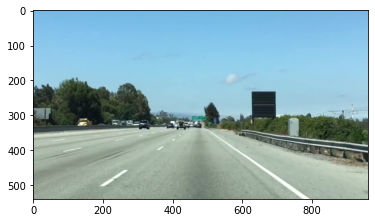

In [90]:
plt.imshow(image)

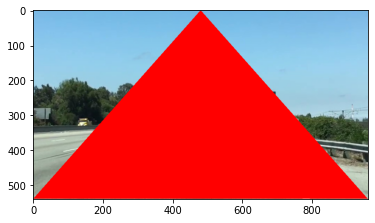

In [91]:
plt.imshow(region_select)